# Part 2 (State-of-the-art Networks)

In [15]:
# Step 1: Set up environment
import torch
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import numpy as np

# importing the required existing architectures
import torchvision.models as models

In [16]:
# Step 2: Prepare dataset
# Define data transformations with feature scaling
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load the CIFAR-10 dataset
Train_dataset = CIFAR10(root='./data', train=True, transform=transform, download=True)
Test_dataset = CIFAR10(root='./data', train=False, transform=transform, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [17]:
# Step 3: Split dataset
# define sizes of train, validation, test datasets
train_size = int(0.6 * len(Train_dataset))
val_size = int(0.2 * len(Train_dataset))
test_size = int(0.2 * len(Train_dataset))


# Splitting datasets
train_dataset, val_dataset, test_dataset = random_split(Train_dataset, [train_size, val_size, test_size])

# Convert datasets to DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
#print(len(train_loader))
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)


In [19]:
# Step 4: Train the model
def train_model(model, train_loader, val_loader, epochs, lr):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    train_losses, val_losses = [], []

    for epoch in range(epochs):
        # Training Step
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            # Backward and Optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

        # Evaluation Step
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        val_losses.append(val_loss / len(val_loader))

        print(f'Epoch {epoch + 1}/{epochs}, Loss: {train_losses[-1]}, Val Loss: {val_losses[-1]}')

    return train_losses, val_losses

In [20]:
# Step 5: Evaluate the Model

# Function for model evaluation
def evaluate_model(model):
    model.eval()
    test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

    all_preds, all_labels = [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_preds)
    conf_matrix = confusion_matrix(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='macro')
    recall = recall_score(all_labels, all_preds, average='macro')

    print(f'Test Accuracy: {accuracy*100} %')

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predict Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    print(f'Precision: {precision}')
    print(f'Recall: {recall}')

Epoch 1/5, Loss: 7.133832141534606, Val Loss: 3.6577727749089526
Epoch 2/5, Loss: 2.6137423187430735, Val Loss: 1.9199330267632844
Epoch 3/5, Loss: 1.6591037219521334, Val Loss: 1.4810064393243971
Epoch 4/5, Loss: 1.3412882488673683, Val Loss: 1.2770427985555808
Epoch 5/5, Loss: 1.159715032018324, Val Loss: 1.1508241003486002


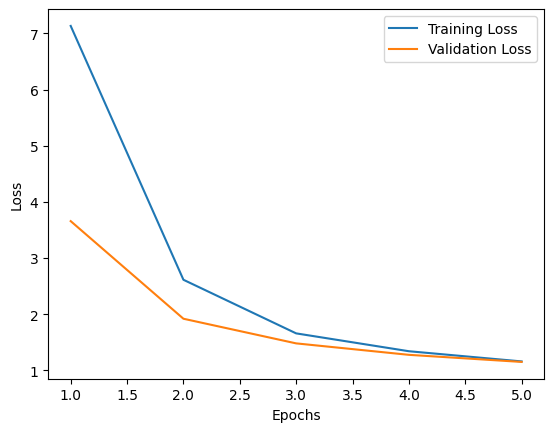

c:\Users\lasit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy: 62.59 %


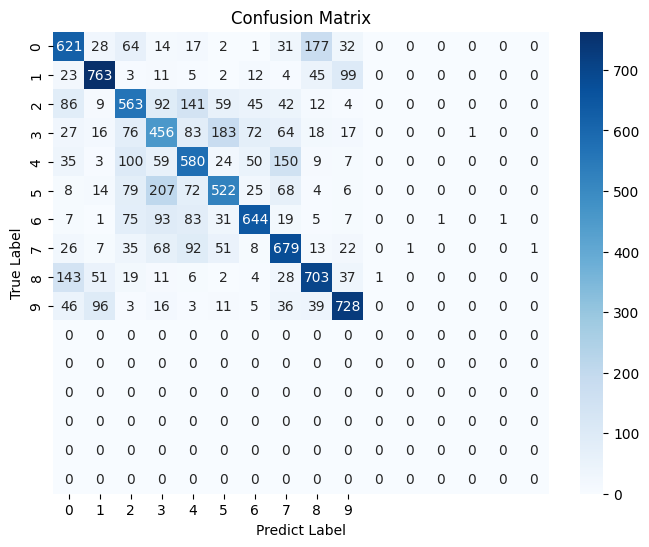

Precision: 0.3935237995767551
Recall: 0.3922359500118888


In [21]:
# For ResNet

# Import model and add final layer
model_Resnet = models.resnet18(pretrained=True)
num_features1 = model_Resnet.fc.in_features
model_Resnet.fc1 = nn.Linear(num_features1, 10)

# Finetune Model
train_losses1, val_losses1 = train_model(model_Resnet, train_loader, val_loader, epochs=5, lr=0.00001)

# Plot training and validation loss
plt.plot(range(1, 6), train_losses1, label='Training Loss')
plt.plot(range(1, 6), val_losses1, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluating Model
evaluate_model(model_Resnet)

c:\Users\lasit\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\lasit\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to C:\Users\lasit/.cache\torch\hub\checkpoints\densenet121-a639ec97.pth
100.0%


Epoch 1/5, Loss: 2.0740015748213096, Val Loss: 1.7246905648784272
Epoch 2/5, Loss: 1.4714408012341336, Val Loss: 1.2787466117530872
Epoch 3/5, Loss: 1.140050714839496, Val Loss: 1.0568616629406145
Epoch 4/5, Loss: 0.9530096662832476, Val Loss: 0.9296692697105894
Epoch 5/5, Loss: 0.8275948827708962, Val Loss: 0.849241733171378


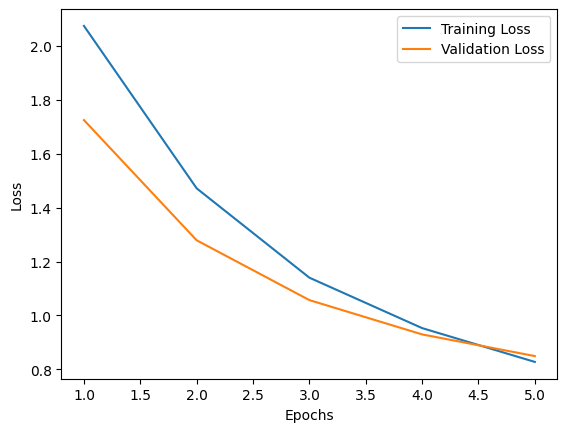

Test Accuracy: 70.6 %


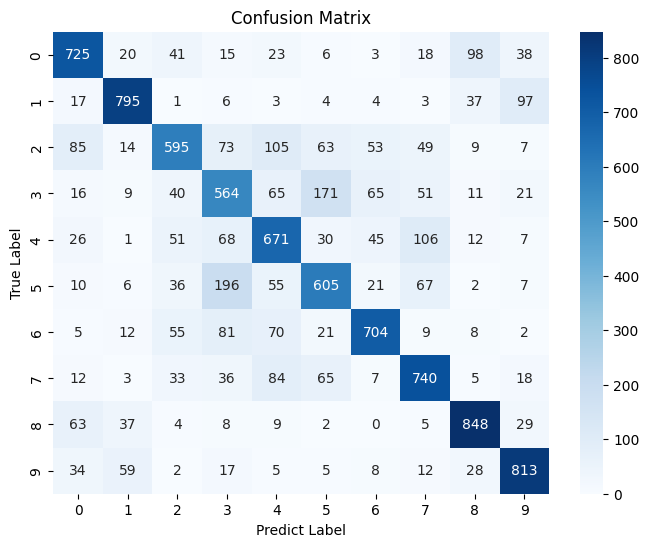

Precision: 0.7079008454234188
Recall: 0.7076920064428587


In [22]:
# For DenseNet

# Import model and add final layer
model_Densenet = models.densenet121(pretrained=True)
num_features2 = model_Densenet.classifier.in_features
model_Densenet.classifier = nn.Linear(num_features2, 10)

# Finetune Model
train_losses2, val_losses2 = train_model(model_Densenet, train_loader, val_loader, epochs=5, lr=0.00001)

# Plot training and validation loss
plt.plot(range(1, 6), train_losses2, label='Training Loss')
plt.plot(range(1, 6), val_losses2, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluating Model
evaluate_model(model_Densenet)